In [1]:
library('reticulate')
source('../src/R/rfunds.R')

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [14]:
pyfunds <- import_from_path('pyfunds', path = "../src/")
reload <- TRUE
if (reload){
    dt <- import("datetime", convert = FALSE)
    fx<-pyfunds$Forex(fx_base="EUR",fx_trade="USD",start_date=dt$date(2010L, 10L, 1L),end_date=dt$date(2020L, 12L, 31L))
    fx$save_to_disk("forex_eurusd.parquet")
}else{
    fx<-pyfunds$Forex(fx_base="EUR",fx_trade="USD")
    fx$read_from_dist("forex_eurusd.parquet")
}

In [17]:
roivar <- fx$calc_roi_var(num_days=7)

In [23]:
roi=roivar[[1]]

In [24]:
nrow(roi)

[1] 4054642

In [25]:
head(roi)

,open,high,low,close,volume
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2010-01-03 23:00:00,1.0000000,1.00000,1.0000000,1.00000,NaN
2010-01-03 23:01:00,0.9998602,1.00007,0.9998602,1.00007,NaN
2010-01-03 23:02:00,0.9999301,1.00007,1.0000000,1.00007,NaN
2010-01-03 23:03:00,0.9999301,1.00014,0.9999301,1.00014,NaN
2010-01-03 23:04:00,1.0000000,1.00014,1.0002098,1.00028,NaN
2010-01-03 23:06:00,1.0000000,1.00021,1.0000699,1.00021,NaN


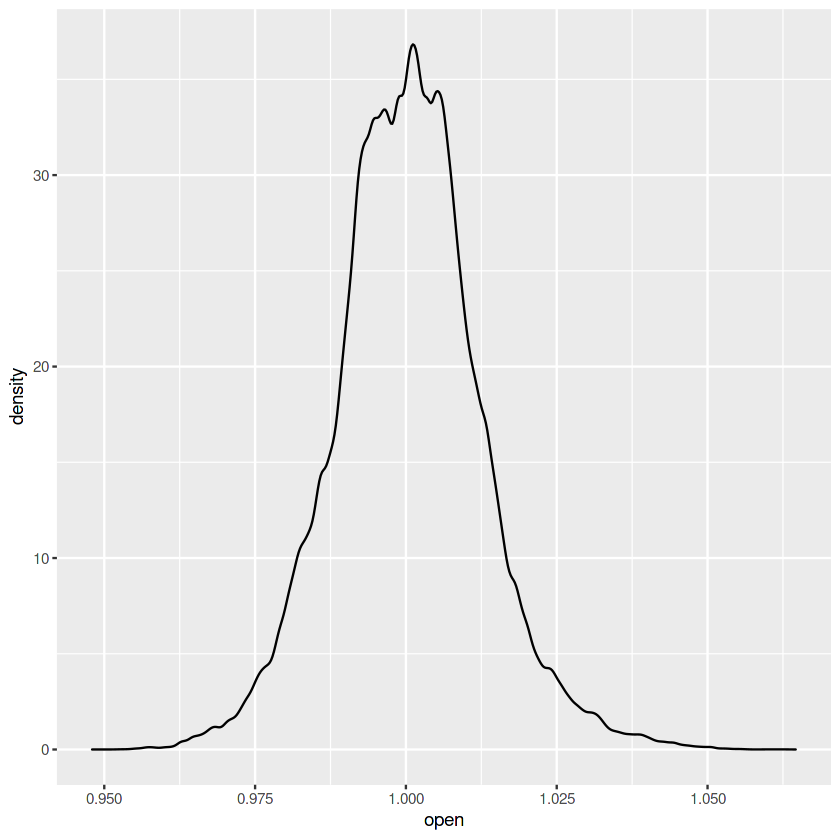

In [26]:
ggplot(roi,aes(x=open))+geom_density()

In [27]:
mean(roi$open)

[1] 1.000376

In [30]:
roi$datetime<-as.POSIXct(rownames(roi))

In [34]:
sum(roi$open>1.025)/nrow(roi)

[1] 0.02824491

In [35]:
1.025^10

[1] 1.280085